Elapsed time: 0.00013518333435058594


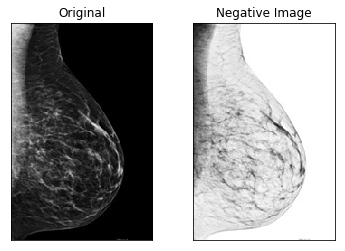

In [3]:
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt

q1_img1_path = "/Users/Will/Desktop/Assign1/q1_BreastDigitalMammogram.jpg"
q1_img1 = cv2.imread(q1_img1_path)
q1_img2 = q1_img1.copy()
height, width, depth = q1_img1.shape

t0 = time.time() 
#traverse through all rows and columns throughout all depth
# for row in range (0, height):
#     for col in range (0, width):
#         for ch in range (0, depth):
#             q1_img2[row, col, ch] = 255 - q1_img2[row, col, ch] #the given formula to negate the color of input image pixel

q1_img2 = 255 - q1_img1;
print("Elapsed time:", time.time() - t0)

#convert the image to RGB
q1_res1 = cv2.cvtColor(q1_img1, cv2.COLOR_BGR2RGB)
q1_res2 = cv2.cvtColor(q1_img2, cv2.COLOR_BGR2RGB)
#saving the output image to destination
cv2.imwrite('/Users/Will/Desktop/Assign1/NegativeImage.jpg', q1_res2)

plt.subplot(121), plt.imshow(q1_res1)
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(q1_res2)
plt.title("Negative Image"), plt.xticks([]), plt.yticks([])
plt.show()

Elapsed time: 4.074512004852295


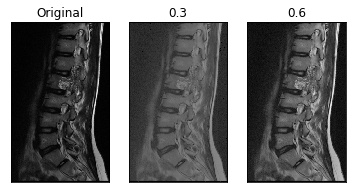

In [2]:
q2_img1_path = "/Users/Will/Desktop/Assign1/q2_LumbarSpineMRI.jpg"
q2_img1 = cv2.imread(q2_img1_path)
q2_img2 = q2_img1.copy()
q2_img3 = q2_img1.copy()
height, width, depth = q2_img1.shape

t0 = time.time() 
for row in range (0, height):
    for col in range (0, width):
        for ch in range (0, depth):
            #given formula in terms of Power-law Transformation
            q2_img2[row, col, ch] = 30*(q2_img2[row, col, ch]**0.3)
            q2_img3[row, col, ch] = 9*(q2_img3[row, col, ch]**0.6)
    
print("Elapsed time:", time.time() - t0)

#convert to image to RGB
q2_res1 = cv2.cvtColor(q2_img1, cv2.COLOR_BGR2RGB)
q2_res2 = cv2.cvtColor(q2_img2, cv2.COLOR_BGR2RGB)
q2_res3 = cv2.cvtColor(q2_img3, cv2.COLOR_BGR2RGB)

#saving the output image to destination
cv2.imwrite('/Users/Will/Desktop/Assign1/0.3Solution.jpg', q2_res2)
cv2.imwrite('/Users/Will/Desktop/Assign1/0.6Solution.jpg', q2_res3)

plt.subplot(1,3,1), plt.imshow(q2_res1)
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2), plt.imshow(q2_res2)
plt.title("0.3"), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3), plt.imshow(q2_res3)
plt.title("0.6"), plt.xticks([]), plt.yticks([])
plt.show()


Elapsed time: 3.6518688201904297


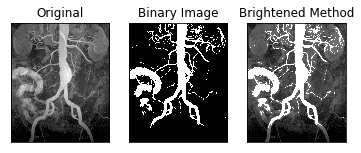

In [25]:
q3_img1_path = "/Users/Will/Desktop/Assign1/q3_AroticAneurysmRadiograph.jpg"
q3_img1 = cv2.imread(q3_img1_path)
q3_img2 = q3_img1.copy()
q3_img3 = q3_img1.copy()
height, width, depth = q3_img1.shape

t0 = time.time() 
for row in range (0, height):
    for col in range (0, width):
        for ch in range (0, depth):
            #threshold pixel value between 120 and 240
            if q3_img2[row, col, ch] >= 120 and q3_img2[row, col, ch] <= 240:
                #makes all selected pixel to white (value of 255)
                q3_img2[row, col, ch] = 255 
                
                #highlight the pixel within range yet restricting the value to a max of 255 (white)
                if q3_img3[row, col, ch]*2 < 255:
                    q3_img3[row, col, ch] = q3_img3[row, col, ch]*2
                else:
                    q3_img3[row, col, ch] = 255
            
            else:
                #makes all pixel outside of range to black (value of 0)
                q3_img2[row, col, ch] = 0

print("Elapsed time:", time.time() - t0)

#convert to RGB image
q3_res1 = cv2.cvtColor(q3_img1, cv2.COLOR_BGR2RGB)
q3_res2 = cv2.cvtColor(q3_img2, cv2.COLOR_BGR2RGB)
q3_res3 = cv2.cvtColor(q3_img3, cv2.COLOR_BGR2RGB)

#saving the output image to destination
cv2.imwrite('/Users/Will/Desktop/Assign1/BinaryImage.jpg', q3_res2)
cv2.imwrite('/Users/Will/Desktop/Assign1/BrightenedMethod.jpg', q3_res3)

plt.subplot(1,3,1), plt.imshow(q3_res1)
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2), plt.imshow(q3_res2)
plt.title("Binary Image"), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3), plt.imshow(q3_res3)
plt.title("Brightened Method"), plt.xticks([]), plt.yticks([])
plt.show()

Elapsed time: 10.55463194847107


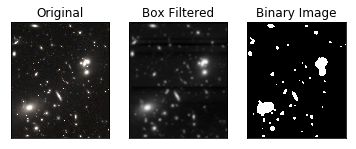

In [27]:
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt

q4_img1_path = "/Users/Will/Desktop/Assign1/q4_HubbleSpaceTelescope.jpg"
q4_img1 = cv2.imread(q4_img1_path)
q4_img2 = q4_img1.copy()
height, width, depth = q4_img1.shape
q4_img2_gray = cv2.cvtColor(q4_img2, cv2.COLOR_BGR2GRAY) #convert to gray-scale
q4_img2_padded = cv2.copyMakeBorder(q4_img2_gray, 7, 7, 7, 7, cv2.BORDER_CONSTANT, 0) #zero-padding
q4_img3 = q4_img2_gray.copy()

#Calculate the sum of 15x15 pixels for the start of each row
def convol_ini(curr_row, curr_col): 
    total = 0 
    for row in range (0, 15):
        for col in range (0, 15):
            result = q4_img2_padded[row, col]
            total = result + total
    return total

#Calculate the sum of subsequent 15x15 pixels by subtracting previous mostleft column and adding the next un-added column
def convol_cont(total, row, col):
    sum = total
    total_add = 0
    total_sub = 0
    for i in range(0, 15):
        to_add = q4_img2_padded[row + i, col + 14]
        total_add = total_add + to_add
        to_sub = q4_img2_padded[row + i, col - 1]
        total_sub = total_sub + to_sub
    sum = sum - total_sub + total_add
    return sum

#sum of 15x15 pixel values then divide by 255 --> value of pixel at (0,0)
curr_sum = convol_ini(0, 0)
q4_img2[0, 0] = curr_sum/225

t0 = time.time() 
for row in range(0, height):
    #resets the 15x15 after each row since the mostright pixel of row 1 has no overlap with row 2's mostleft pixel
    curr_sum = convol_ini(row, 0)
    for col in range(1, width):
        curr_sum = convol_cont(curr_sum, row, col)
        q4_img2_gray[row, col] = curr_sum/225

#Thresholding value
for row in range (0, height):
    for col in range (0, width):
        if q4_img2_gray[row, col] >=70:
            q4_img3[row, col] = 255
        else:
            q4_img3[row, col] = 0

print("Elapsed time:", time.time() - t0)

#convert image to RGB
q4_res1 = cv2.cvtColor(q4_img1, cv2.COLOR_BGR2RGB)
q4_res2 = cv2.cvtColor(q4_img2_gray, cv2.COLOR_GRAY2RGB)
q4_res3 = cv2.cvtColor(q4_img3, cv2.COLOR_GRAY2RGB)

#saving the output image to destination
cv2.imwrite('/Users/Will/Desktop/Assign1/BoxFiltered.jpg', q4_res2)
cv2.imwrite('/Users/Will/Desktop/Assign1/BinaryImage.jpg', q4_res3)

plt.subplot(1,3,1), plt.imshow(q4_res1)
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2), plt.imshow(q4_res2)
plt.title("Box Filtered"), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3), plt.imshow(q4_res3)
plt.title("Binary Image"), plt.xticks([]), plt.yticks([])
plt.show()

Elapsed time: 7.3836891651153564


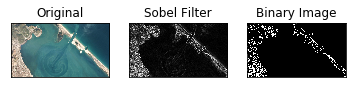

In [29]:
q5_img1_path = "/Users/Will/Desktop/Assign1/q5_SatelliteImage.jpg"
q5_img1 = cv2.imread(q5_img1_path)
q5_img1_gray = cv2.cvtColor(q5_img1, cv2.COLOR_BGR2GRAY)
q5_img1_padded = cv2.copyMakeBorder(q5_img1_gray, 1, 1, 1, 1, cv2.BORDER_CONSTANT, 0) #zero-padding
q5_img2 = q5_img1_gray.copy()
height, width = q5_img1_gray.shape

#kernel
k_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
k_x = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
#the matrix to be multiplied with the kernel
B = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

#setting the current position matrix to B
def curr_matrix(curr_row, curr_col):
    for row in range(0, 3):
        for col in range(0, 3):
            B[row, col] = q5_img1_padded[row + curr_row, col + curr_col]
    return B

t0 = time.time()
for row in range(0, height):
    for col in range(0, width):
        B = curr_matrix(row, col)
        #product of matrix B and kernel, then the summation of resultant
        product_x = (B * k_x).sum()
        product_y = (B * k_y).sum()
        #Sobel filter
        value = (product_x**2 + product_y**2)**0.5
        q5_img2[row, col] = value

# Threshold
q5_img3 =  q5_img2.copy()
for row in range(0, height):
    for col in range(0, width):
        if q5_img2[row, col] > 120:
            q5_img3[row, col] = 255
        else:
            q5_img3[row, col] = 0

print("Elapsed time:", time.time() - t0)

#convert image to RGB
q5_res1 = cv2.cvtColor(q5_img1, cv2.COLOR_BGR2RGB)
q5_res2 = cv2.cvtColor(q5_img2, cv2.COLOR_GRAY2RGB)
q5_res3 = cv2.cvtColor(q5_img3, cv2.COLOR_GRAY2RGB)

#saving the output image to destination
cv2.imwrite('/Users/Will/Desktop/Assign1/SobelFiltered.jpg', q5_res2)
cv2.imwrite('/Users/Will/Desktop/Assign1/BinaryImage.jpg', q5_res3)

plt.subplot(1,3,1), plt.imshow(q5_res1)
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2), plt.imshow(q5_res2)
plt.title("Sobel Filter"), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3), plt.imshow(q5_res3)
plt.title("Binary Image"), plt.xticks([]), plt.yticks([])
plt.show()

Elapsed time: 2.347926139831543


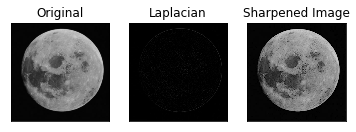

In [15]:
q6_img1_path = "/Users/Will/Desktop/Assign1/q6_Moon.jpg"
q6_img1 = cv2.imread(q6_img1_path)
q6_img1_gray = cv2.cvtColor(q6_img1, cv2.COLOR_BGR2GRAY)
q6_img1_padded = cv2.copyMakeBorder(q6_img1_gray, 1, 1, 1, 1, cv2.BORDER_CONSTANT, 0) #zero-padding
q6_img2 = q6_img1_gray.copy()
q6_img3 = q6_img1_gray.copy()
height, width = q6_img1_gray.shape

#Laplacian mask
mask = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
C = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

#Set the current range of matrix into a 3x3
def curr_matrix(curr_row, curr_col):
    for row in range(0, 3):
        for col in range(0, 3):
            C[row, col] = q6_img1_padded[row + curr_row, col + curr_col]
    return C

t0 = time.time()
for row in range(0, height):
    for col in range(0, width):
        C = curr_matrix(row, col)
        product = C*mask
        value = product.sum()
        #reset all negative pixel value to 0 as the value of -5 will result in 250 
        if value < 0:
            q6_img2[row,col] = 0
        else:
            q6_img2[row, col] = value 

for row in range(0, height):
    for col in range(0, width):
        #Given formulat with constant c set as '-2'
        pix = q6_img1_gray[row,col] - 2*(q6_img2[row, col])
        #Again, reset all negative value to 0
        if pix < 0:
            q6_img3[row, col] = 0
        else:
            q6_img3[row, col] = pix

print("Elapsed time:", time.time() - t0)

#convert image to RGB
q6_res1 = cv2.cvtColor(q6_img1, cv2.COLOR_BGR2RGB)
q6_res2 = cv2.cvtColor(q6_img2, cv2.COLOR_GRAY2RGB)
q6_res3 = cv2.cvtColor(q6_img3, cv2.COLOR_GRAY2RGB)

#saving the output image to destination
cv2.imwrite('/Users/Will/Desktop/Assign1/Laplacian.jpg', q6_res2)
cv2.imwrite('/Users/Will/Desktop/Assign1/SharpenedImage.jpg', q6_res3)

plt.subplot(1,3,1), plt.imshow(q6_res1)
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2), plt.imshow(q6_res2)
plt.title("Laplacian"), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3), plt.imshow(q6_res3)
plt.title("Sharpened Image"), plt.xticks([]), plt.yticks([])
plt.show()